In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13, 6)
sns.set(font_scale=1.5, style="white")

In [99]:
df = pd.read_csv('finaldata1.csv', parse_dates = ['date'])

In [100]:
df

,Unnamed: 0,country,year_week,new_cases,tests_done,population_x,testing_rate,positivity_rate,indicator,date,...,code,total_cases,total_deaths,stringency_index,population_y,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
0,126,Austria,2020-W24,170,35243,8858775.0,397.831529,0.482365,Daily hospital occupancy,2020-06-08,...,AUT,16868.0,672.0,43.52,9006400,45436.686,0.908,0.039839,0.001873,0.000075
1,127,Austria,2020-W24,170,35243,8858775.0,397.831529,0.482365,Daily ICU occupancy,2020-06-08,...,AUT,16868.0,672.0,43.52,9006400,45436.686,0.908,0.039839,0.001873,0.000075
2,128,Austria,2020-W24,170,35243,8858775.0,397.831529,0.482365,Daily hospital occupancy,2020-06-09,...,AUT,16889.0,672.0,43.52,9006400,45436.686,0.908,0.039789,0.001875,0.000075
3,129,Austria,2020-W24,170,35243,8858775.0,397.831529,0.482365,Daily ICU occupancy,2020-06-09,...,AUT,16889.0,672.0,43.52,9006400,45436.686,0.908,0.039789,0.001875,0.000075
4,130,Austria,2020-W24,170,35243,8858775.0,397.831529,0.482365,Daily hospital occupancy,2020-06-10,...,AUT,16902.0,672.0,43.52,9006400,45436.686,0.908,0.039759,0.001877,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5041,8065,Sweden,2020-W42,5620,148268,10230185.0,1449.318854,3.790434,Daily ICU occupancy,2020-10-14,...,SWE,101634.0,5916.0,37.04,10099270,46949.283,0.933,0.058209,0.010063,0.000586
5042,8066,Sweden,2020-W42,5620,148268,10230185.0,1449.318854,3.790434,Daily hospital occupancy,2020-10-15,...,SWE,102604.0,5917.0,37.04,10099270,46949.283,0.933,0.057668,0.010160,0.000586
5043,8067,Sweden,2020-W42,5620,148268,10230185.0,1449.318854,3.790434,Daily ICU occupancy,2020-10-15,...,SWE,102604.0,5917.0,37.04,10099270,46949.283,0.933,0.057668,0.010160,0.000586
5044,8068,Sweden,2020-W42,5620,148268,10230185.0,1449.318854,3.790434,Daily hospital occupancy,2020-10-16,...,SWE,103200.0,5918.0,37.04,10099270,46949.283,0.933,0.057345,0.010219,0.000586


__new_cases__ : number of new confirmed cases

__testing_rate__: Testing rate per 100 000 population

__positivity_rate__: Weekly test positivity (%): number of new cases/number of tests per week %

__year_week__: YYYY-Www

__stringency_index__: scale of 1-100 where 100 is stricted measures e.g. workplace shutdown, school closure

__value__: Number of patients or new admissions per 100 000 corresponding to indicator

source: 
- https://www.ecdc.europa.eu/en/publications-data/download-data-hospital-and-icu-admission-rates-and-current-occupancy-covid-19
- https://www.ecdc.europa.eu/en/publications-data/covid-19-testing
- https://www.kaggle.com/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy

In [101]:
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

In [102]:
df.isna().sum()

country               0
year_week             0
new_cases             0
tests_done            0
population_x          0
testing_rate          0
positivity_rate       0
indicator             0
date                  0
value                 0
code                  0
total_cases           0
total_deaths          0
stringency_index    156
population_y          0
GDP_capita            0
HDI                   0
mortality_rate        0
prop_cases            0
prop_death            0
dtype: int64

In [103]:
df.describe()

,new_cases,tests_done,population_x,testing_rate,positivity_rate,value,total_cases,total_deaths,stringency_index,population_y,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
count,5046.000000,5.046000e+03,5.046000e+03,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,4890.000000,5.046000e+03,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000
mean,5361.945501,1.513707e+05,1.550216e+07,1889.875617,2.594354,440.149822,62898.373365,5341.983353,43.885352,1.542192e+07,41033.005398,0.891009,0.054566,0.004026,0.000222
std,15911.004742,2.320259e+05,2.170246e+07,3441.502675,3.109377,1275.064280,102238.340375,9967.484377,11.824552,2.155538e+07,17267.328509,0.039533,0.043188,0.003061,0.000233
min,0.000000,3.960000e+02,3.569910e+05,52.229429,0.000000,0.000000,964.000000,10.000000,11.110000,3.412500e+05,18563.307000,0.811000,0.002606,0.000280,0.000005
25%,162.000000,1.954500e+04,2.080908e+06,509.568114,0.494234,8.000000,4133.000000,119.000000,36.110000,2.078932e+06,29481.252000,0.865000,0.025150,0.001658,0.000049
50%,1072.000000,7.710500e+04,7.000039e+06,863.516683,1.448803,49.000000,21398.500000,711.000000,43.520000,6.948445e+06,38605.671000,0.901000,0.039332,0.003046,0.000107
75%,3725.000000,1.414200e+05,1.145552e+07,1525.129276,3.369344,277.750000,70848.750000,5862.000000,50.930000,1.158962e+07,46682.515000,0.929000,0.068202,0.005488,0.000360
max,241473.000000,1.428405e+06,8.301921e+07,23785.376629,24.725164,12269.000000,897034.000000,36543.000000,72.690000,8.378394e+07,94277.965000,0.953000,0.189507,0.019166,0.000898


In [119]:
by_country = df.groupby('country').mean()
by_country = by_country.reset_index()
by_country.head()

,country,new_cases,tests_done,population_x,testing_rate,positivity_rate,value,total_cases,total_deaths,stringency_index,population_y,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
0,Austria,2670.164179,76989.544776,8858775.0,869.076647,2.770642,104.395522,28412.164179,740.462687,36.655846,9006400.0,45436.686,0.908,0.029732,0.003155,0.000082
1,Belgium,9353.287879,165663.363636,11455519.0,1446.144550,3.679755,258.420455,89333.136364,9815.825758,51.333712,11589616.0,42658.576,0.916,0.122268,0.007708,0.000847
2,Bulgaria,1461.328358,27423.447761,7000039.0,391.761357,5.203651,369.052239,13277.380597,503.350746,34.745455,6948445.0,18563.307,0.813,0.039757,0.001911,0.000072
3,Croatia,1299.485075,19536.671642,4076246.0,479.280977,5.457724,185.813433,8779.388060,180.500000,29.897953,4105268.0,22669.797,0.831,0.026834,0.002139,0.000044
4,Cyprus,63.425197,15893.905512,875899.0,1814.581991,0.333305,2.500000,1304.480315,20.157480,51.762835,875899.0,32415.132,0.869,0.016026,0.001489,0.000023


Text(0.5, 0, 'Country')

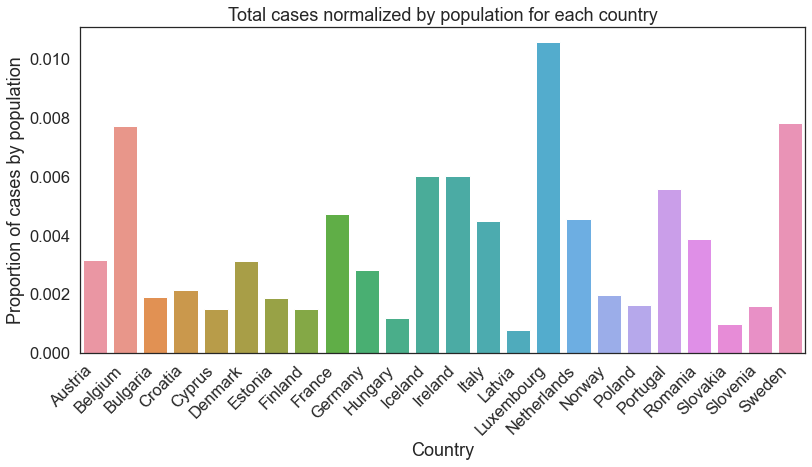

In [105]:
ax = sns.barplot(x = 'country', y = 'prop_cases', data = by_country)
plt.xticks(rotation = 45, horizontalalignment="right")
ax.set_title("Total cases normalized by population for each country")
ax.set_ylabel("Proportion of cases by population")
ax.set_xlabel('Country')

- Luxembourg has the highest average proportion of cases 
- Latvia has the lowest average proportion of cases

Text(0.5, 0, 'Country')

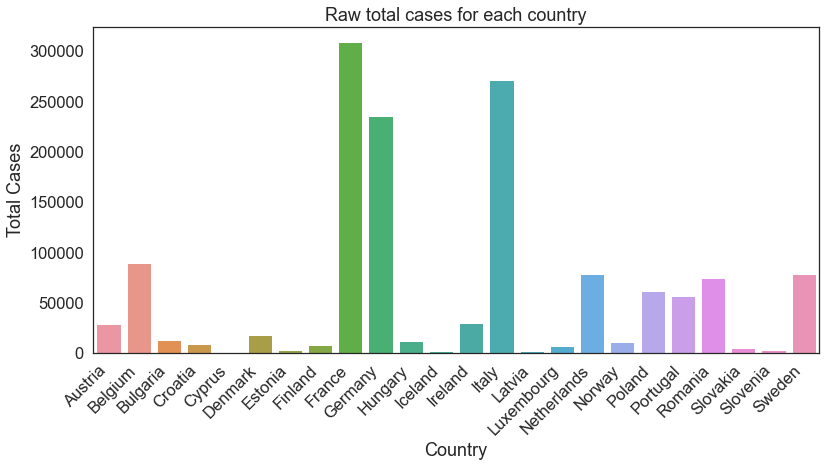

In [106]:
ax = sns.barplot(x = 'country', y = 'total_cases', data = by_country)
plt.xticks(rotation = 45, horizontalalignment="right")
ax.set_title("Raw total cases for each country")
ax.set_ylabel("Total Cases")
ax.set_xlabel('Country')

- France has the highest average total cases, followed by Italy and Germany.
- Cyprus has the least average total cases

Text(0.5, 0, 'Country')

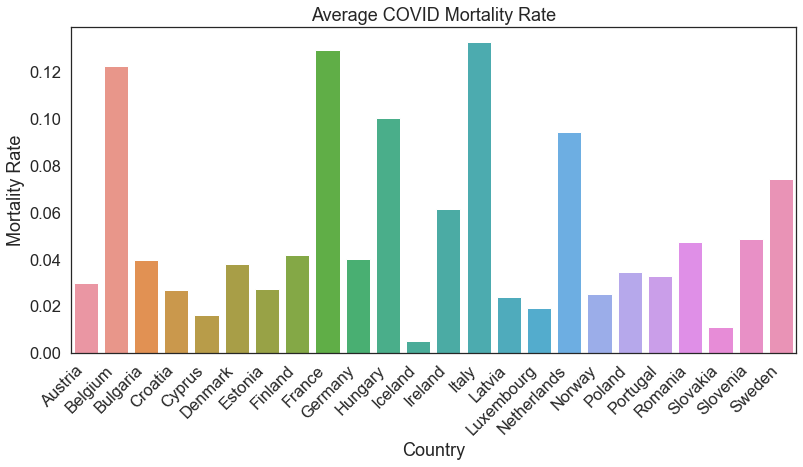

In [107]:
ax = sns.barplot(x = 'country', y = 'mortality_rate', data = by_country)
plt.xticks(rotation = 45, horizontalalignment="right")
ax.set_title("Average COVID Mortality Rate")
ax.set_ylabel("Mortality Rate")
ax.set_xlabel('Country')

- Italy has the highest average mortality rate, followed by France and Belgium
- Iceland has the lowest average mortality rate

Text(0.5, 0, 'Country')

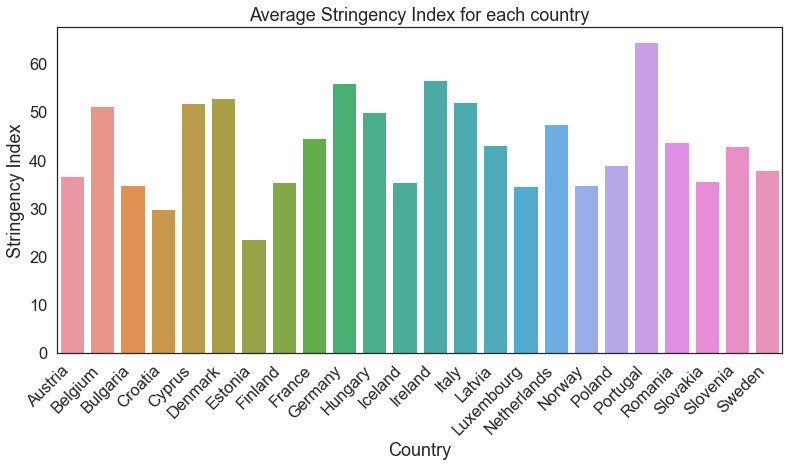

In [108]:
ax = sns.barplot(x = 'country', y = 'stringency_index', data = by_country)
plt.xticks(rotation = 45, horizontalalignment="right")
ax.set_title("Average Stringency Index for each country")
ax.set_ylabel("Stringency Index")
ax.set_xlabel('Country')

- Portugal has the highest average stringency index, followed by Ireland and Germany.
- Estonia has teh lowest average stringency index

Text(0.5, 0, 'Country')

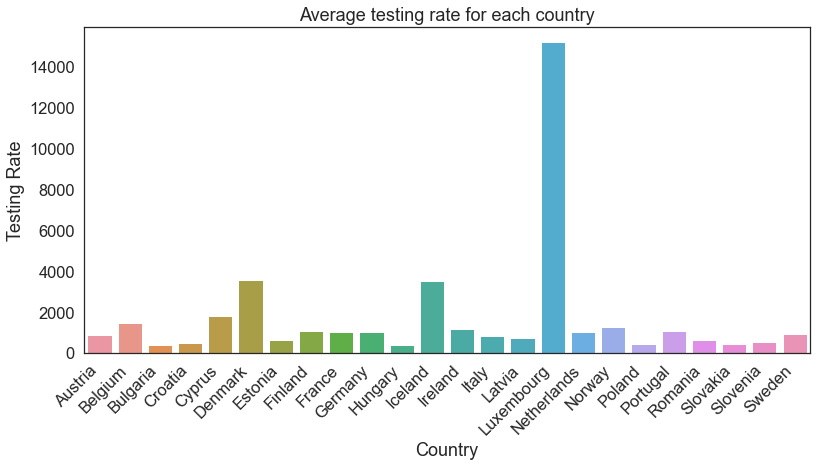

In [109]:
ax = sns.barplot(x = 'country', y = 'testing_rate', data = by_country)
plt.xticks(rotation = 45, horizontalalignment="right")
ax.set_title("Average testing rate for each country")
ax.set_ylabel("Testing Rate")
ax.set_xlabel('Country')

- Luxembourg has the highest average testing rate 
- Hungary has the lowest average testing rate

Text(0.5, 1.0, 'Testing rate vs Mortality Rate')

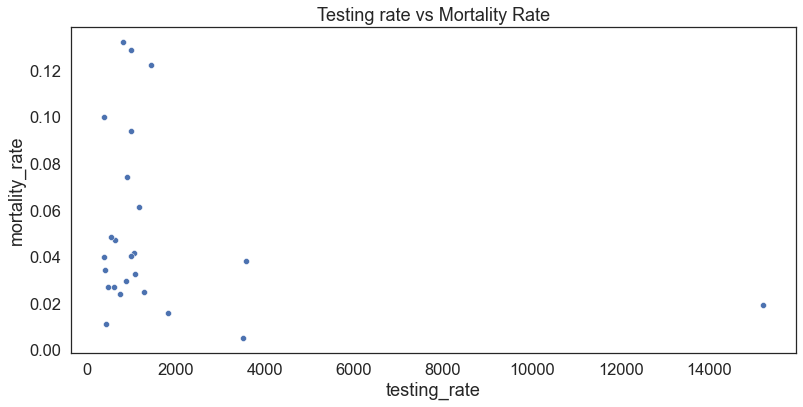

In [110]:
ax = sns.scatterplot(x = 'testing_rate', y = 'mortality_rate', data = by_country)
ax.set_title("Testing rate vs Mortality Rate")

Text(0.5, 1.0, 'HDI vs mortality rate')

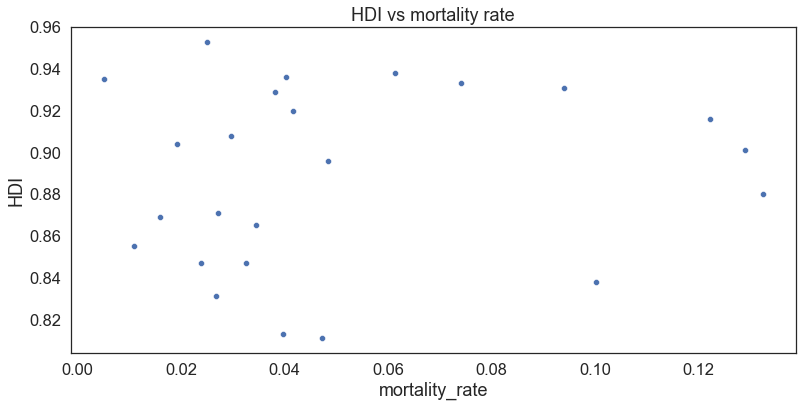

In [111]:
ax = sns.scatterplot(x = 'mortality_rate', y = 'HDI', data = by_country)
ax.set_title("HDI vs mortality rate")

In [112]:
by_time = df.groupby(['country','year_week']).mean()
by_time = by_time.reset_index()
by_time

,country,year_week,new_cases,tests_done,population_x,testing_rate,positivity_rate,value,total_cases,total_deaths,stringency_index,population_y,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
0,Austria,2020-W24,170,35243,8858775.0,397.831529,0.482365,38.357143,16938.142857,673.571429,43.52,9006400,45436.686,0.908,0.039767,0.001881,0.000075
1,Austria,2020-W25,247,15775,8858775.0,178.072025,1.565769,37.000000,17129.000000,683.857143,43.52,9006400,45436.686,0.908,0.039924,0.001902,0.000076
2,Austria,2020-W26,340,61905,8858775.0,698.798649,0.549229,35.000000,17404.428571,694.571429,43.52,9006400,45436.686,0.908,0.039908,0.001932,0.000077
3,Austria,2020-W27,644,45284,8858775.0,511.176771,1.422136,35.214286,17871.857143,704.285714,43.52,9006400,45436.686,0.908,0.039412,0.001984,0.000078
4,Austria,2020-W28,578,48936,8858775.0,552.401432,1.181135,40.285714,18517.285714,706.000000,38.36,9006400,45436.686,0.908,0.038130,0.002056,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Sweden,2020-W38,2080,139471,10230185.0,1363.328229,1.491349,81.428571,88076.142857,5862.000000,37.04,10099270,46949.283,0.933,0.066560,0.008721,0.000580
470,Sweden,2020-W39,2919,128852,10230185.0,1259.527565,2.265390,84.214286,90553.714286,5873.285714,37.04,10099270,46949.283,0.933,0.064867,0.008966,0.000582
471,Sweden,2020-W40,3642,127917,10230185.0,1250.387945,2.847159,88.357143,93854.000000,5885.571429,37.04,10099270,46949.283,0.933,0.062720,0.009293,0.000583
472,Sweden,2020-W41,4278,137109,10230185.0,1340.239693,3.120145,99.214286,97811.571429,5903.142857,37.04,10099270,46949.283,0.933,0.060365,0.009685,0.000585


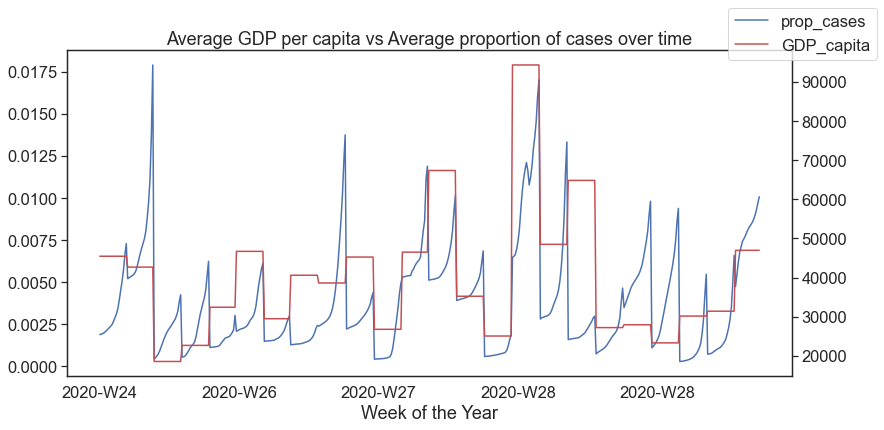

In [113]:
ax = by_time.plot(x="year_week", y="prop_cases", legend=False)
ax2 = ax.twinx()
by_time.plot(x="year_week", y="GDP_capita", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_title("Average GDP per capita vs Average proportion of cases over time")
ax.set_xlabel("Week of the Year")
plt.show()

- similar peaks followed by average proportion of cases and average GDP per capita over time.
- (except for peak of cases in week 28)

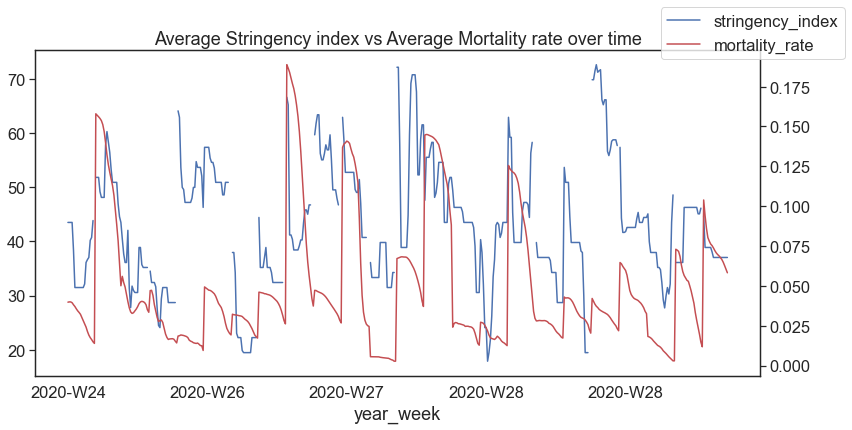

In [114]:
ax = by_time.plot(x="year_week", y="stringency_index", legend=False)
ax2 = ax.twinx()
by_time.plot(x="year_week", y="mortality_rate", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_title("Average Stringency index vs Average Mortality rate over time")
plt.show()

In [121]:
by_indicator = df.groupby(['country','indicator']).mean()
by_indicator = by_indicator.reset_index()
by_indicator.head()

,country,indicator,new_cases,tests_done,population_x,testing_rate,positivity_rate,value,total_cases,total_deaths,stringency_index,population_y,GDP_capita,HDI,mortality_rate,prop_cases,prop_death
0,Austria,Daily ICU occupancy,2670.164179,76989.544776,8858775.0,869.076647,2.770642,37.985075,28412.164179,740.462687,36.655846,9006400.0,45436.686,0.908,0.029732,0.003155,0.000082
1,Austria,Daily hospital occupancy,2670.164179,76989.544776,8858775.0,869.076647,2.770642,170.805970,28412.164179,740.462687,36.655846,9006400.0,45436.686,0.908,0.029732,0.003155,0.000082
2,Belgium,Daily ICU occupancy,9353.287879,165663.363636,11455519.0,1446.144550,3.679755,86.689394,89333.136364,9815.825758,51.333712,11589616.0,42658.576,0.916,0.122268,0.007708,0.000847
3,Belgium,Daily hospital occupancy,9353.287879,165663.363636,11455519.0,1446.144550,3.679755,430.151515,89333.136364,9815.825758,51.333712,11589616.0,42658.576,0.916,0.122268,0.007708,0.000847
4,Bulgaria,Daily ICU occupancy,1461.328358,27423.447761,7000039.0,391.761357,5.203651,42.365672,13277.380597,503.350746,34.745455,6948445.0,18563.307,0.813,0.039757,0.001911,0.000072


<AxesSubplot:title={'center':'Daily Hospital/ICU occupancy for each country'}, xlabel='Country', ylabel='Number per 100000'>

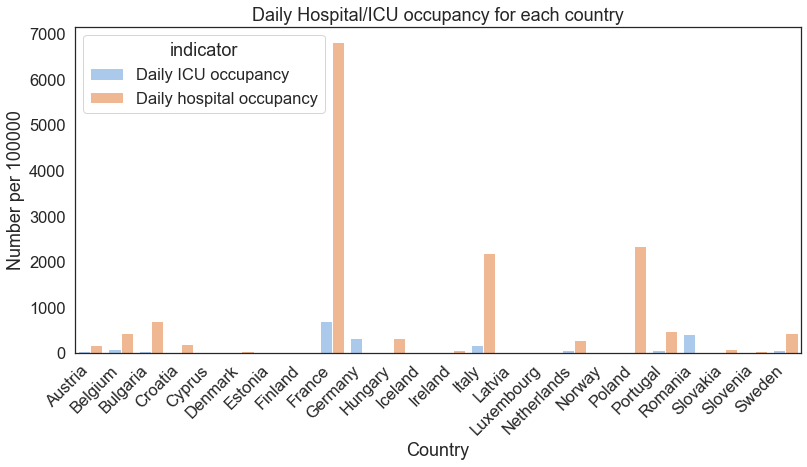

In [120]:
ax = sns.barplot(x = 'country', y = 'value', hue = 'indicator', data = by_indicator, palette = 'pastel')
plt.xticks(rotation = 45, horizontalalignment = 'right')
ax.set_title("Daily Hospital/ICU occupancy for each country")
ax.set_ylabel("Number per 100000")
ax.set_xlabel("Country")
ax

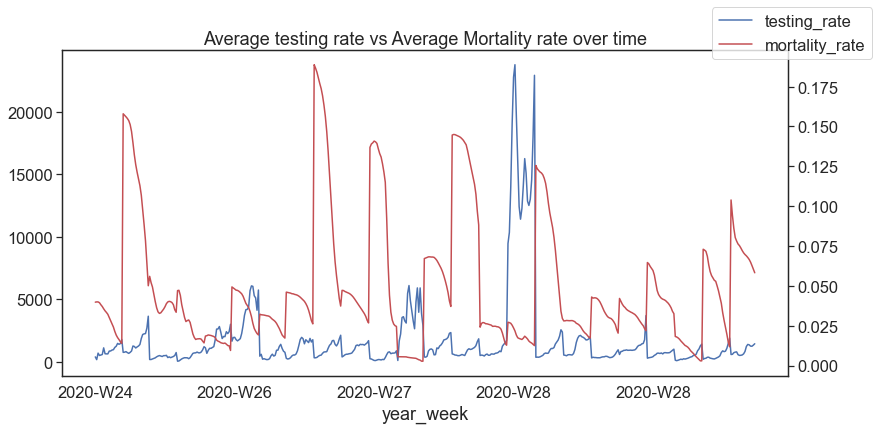

In [117]:
ax = by_time.plot(x="year_week", y="testing_rate", legend=False)
ax2 = ax.twinx()
by_time.plot(x="year_week", y="mortality_rate", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_title("Average testing rate vs Average Mortality rate over time")
plt.show()

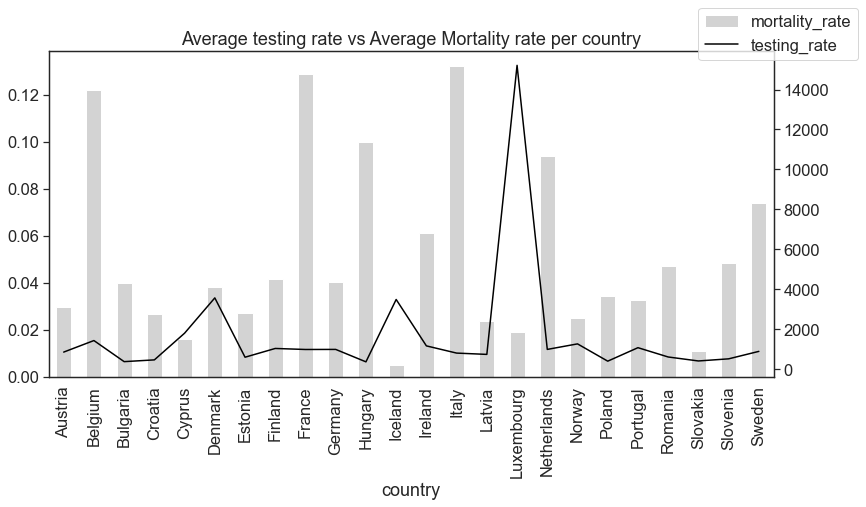

In [118]:
ax = by_country.plot(x="country", y="mortality_rate", kind = 'bar', legend=False, color = 'lightgrey')
ax2 = ax.twinx()
by_country.plot(x="country", y="testing_rate", ax=ax2,  legend=False, color = 'black')
ax.figure.legend()
ax.set_title("Average testing rate vs Average Mortality rate per country")
plt.show()

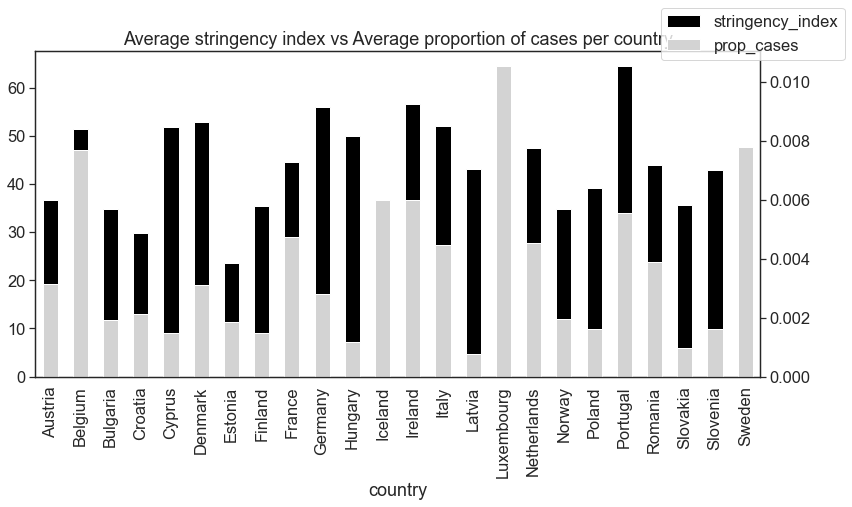

In [135]:
ax = by_country.plot(x="country", y="stringency_index",legend=False,kind = 'bar', color = 'black')
ax2 = ax.twinx()
by_country.plot(x="country", y="prop_cases", ax=ax2,  legend=False, kind = 'bar', color = 'lightgrey')
ax.figure.legend()
ax.set_title("Average stringency index vs Average proportion of cases per country")
plt.show()